In [35]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# Use pandas to get some insights into the data

In [23]:
# importing the data
df = pd.read_csv('house_rental_data.csv.txt' , index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [24]:
# Shape of the Data
df.shape

(645, 7)

In [25]:
# Rows and Columns
print("No of Rows : " , df.shape[0])
print("No of Columns : " , df.shape[1])

No of Rows :  645
No of Columns :  7


In [31]:
# Checking the Missing Value
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [32]:
# Evaluating the Data
print(df.keys())

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')


In [30]:
# Checking the data types 
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [33]:
# Statistical measures of the datasets
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [34]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


# Show some interesting visualization of the data

In [36]:
correlation = df.corr()

<AxesSubplot:>

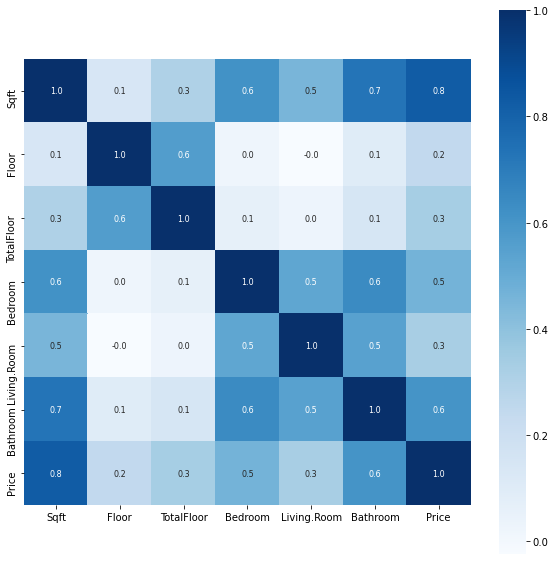

In [37]:
# Constructing a heatmap to understand the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True , square=True , fmt='.1f' , annot=True , annot_kws={'size':8} , cmap='Blues')

# Manage data for training & testing

In [40]:
X = df.drop(['Price'] , axis= 1) 
Y = df['Price']

In [41]:
print(X)
print(Y)

         Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom
1    1177.698      2           7        2            2         2
2    2134.800      5           7        4            2         2
3    1138.560      5           7        2            2         1
4    1458.780      2           7        3            2         2
5     967.776     11          14        3            2         2
..        ...    ...         ...      ...          ...       ...
644  1359.156      7          15        3            2         2
645   377.148      4          10        1            1         1
646   740.064     13          14        1            1         1
647  1707.840      3          14        3            2         2
648  1376.946      6           7        3            2         1

[645 rows x 6 columns]
1      62000
2      78000
3      58000
4      45000
5      45000
       ...  
644    45000
645    24800
646    45000
647    65000
648    36000
Name: Price, Length: 645, dtype: int64


In [42]:
# Perfoming the train test split
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2 , random_state=3)

In [43]:
# Confirming whether train test split is performed properly or not
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(645, 6)
(645,)
(516, 6)
(129, 6)
(516,)
(129,)


In [49]:
# Finding Optimal Value of k
# Empty list for appending rmse

rmse_val = []

for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(Y_test,pred))
    rmse_val.append(error)
    print("RMSE Value for k =", k , ":" , error )
    

RMSE Value for k = 1 : 21215.73140439084
RMSE Value for k = 2 : 20401.416013944498
RMSE Value for k = 3 : 19758.398908800187
RMSE Value for k = 4 : 19464.88056646045
RMSE Value for k = 5 : 19457.894374072395
RMSE Value for k = 6 : 19701.638717203085
RMSE Value for k = 7 : 19730.301357048007
RMSE Value for k = 8 : 20271.55564242372
RMSE Value for k = 9 : 20216.445170238876
RMSE Value for k = 10 : 19865.86037735682
RMSE Value for k = 11 : 19782.77714879486
RMSE Value for k = 12 : 20069.91038759613
RMSE Value for k = 13 : 20163.908943953564
RMSE Value for k = 14 : 20035.396403779912
RMSE Value for k = 15 : 19858.17942600784
RMSE Value for k = 16 : 19970.966104672527
RMSE Value for k = 17 : 19936.2393717572
RMSE Value for k = 18 : 20017.807753872123
RMSE Value for k = 19 : 20080.516605033852


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X do

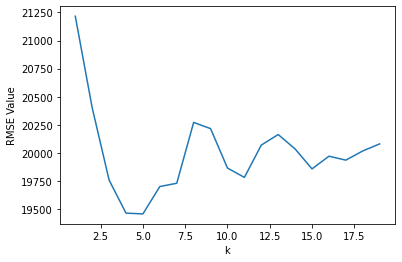

In [50]:
k_range = range(1,20)
plt.plot(k_range , rmse_val)
plt.xlabel('k')
plt.ylabel('RMSE Value')
plt.show()

In [51]:
# Optimal Model
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(Y_test,pred))
print("RMSE : " , error)

RMSE :  19464.88056646045


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
